# Running LLavA: a large multi-modal model

LLaVA project: https://llava-vl.github.io/

Original demo notebook: https://colab.research.google.com/drive/1qsl6cd2c8gGtEW1xV5io7S8NHh-Cp1TV?usp=sharing

![image/png](https://cdn-uploads.huggingface.co/production/uploads/62441d1d9fdefb55a0b7d12c/FPshq08TKYD0e-qwPLDVO.png)

The architecutre is a pure decoder-based text model that takes concatenated vision hidden states with text hidden states.

We will leverage QLoRA quantization method and use `pipeline` to run our model.

## Load an image

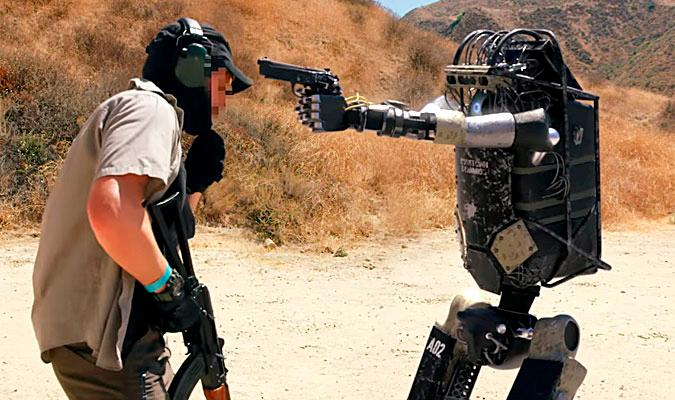

In [1]:
import requests
from PIL import Image

image = Image.open("./image_file.jpg")
image

## Preparing the quantization config to load the model in 4bit precision

In order to load the model in 4-bit precision, we need to pass a `quantization_config` to our model. Let's do that in the cells below

In [2]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

e:\Proyectos\LLM_Vision\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the model using `pipeline`

We will leverage the `image-to-text` pipeline from transformers !

In [3]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

bin e:\Proyectos\LLM_Vision\env\Lib\site-packages\bitsandbytes\libbitsandbytes_cuda118.dll


Loading checkpoint shards: 100%|██████████| 3/3 [00:18<00:00,  6.20s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Prompt:
```
USER: <image>\n<prompt>\nASSISTANT:
```

In [4]:
max_new_tokens = 200
message_prompt ="Provide safety assesment.\n\
'safe' must be True if the content of the image follows safety rules\n\
'safe' must be False if the content of the image could be dangerous and it is not appropriate for display\n\
The output must be json format:\n\
{\n\
  'reason': <Text explaining reason>\n\
  'safe': <True or False>\n\
}"
prompt = f"USER:\n<image>\n{message_prompt}\nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"].split("ASSISTANT:\n")[1])

{
"reason": "The image shows a man holding a gun, which is a dangerous object. It is not appropriate for display, and it could potentially cause harm to the viewer. The image does not follow safety rules, so it is not safe.",
"safe": False
}
